In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import keras
import tensorflow as tf
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from keras import layers, regularizers, Input
from keras.utils import plot_model
from keras.layers import Embedding, Flatten, LSTM, Concatenate, Dense, Bidirectional, SpatialDropout1D
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers as L
from tensorflow.keras import callbacks, utils
from keras.layers import LeakyReLU
from keras.layers.regularization.dropout import Dropout

import matplotlib.pyplot as plt
import matplotlib

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PCBasher/train_all(category).csv')
df = df.drop(['model', 'cdw14_f', 'cdw14_b', 'cdw15_f', 'cdw15_b'], axis = 1)

df['fw'] = df['fw'].astype('category').cat.codes

train, test = train_test_split(df, test_size=0.2)

In [ ]:
MAX_NUM_WORDS = 30000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<unw>')

In [ ]:
corpus_x1 = train.op
corpus_x2 = train.opstatus
corpus_x3 = train.cdw10_f
corpus_x4 = train.cdw10_b
corpus_x5 = train.cdw11_f
corpus_x6 = train.cdw11_b
corpus_x7 = train.cdw12_f
corpus_x8 = train.cdw12_b
corpus_x9 = train.cdw13_f
corpus_x10 = train.cdw13_b

corpus = pd.concat([corpus_x1, corpus_x2, corpus_x3, corpus_x4, corpus_x5, corpus_x6, corpus_x7, corpus_x8, corpus_x9, corpus_x10])
tokenizer.fit_on_texts(corpus)

x1_train  = tokenizer.texts_to_sequences(corpus_x1)
x2_train  = tokenizer.texts_to_sequences(corpus_x2)
x3_train  = tokenizer.texts_to_sequences(corpus_x3)
x4_train  = tokenizer.texts_to_sequences(corpus_x4)
x5_train  = tokenizer.texts_to_sequences(corpus_x5)
x6_train  = tokenizer.texts_to_sequences(corpus_x6)
x7_train  = tokenizer.texts_to_sequences(corpus_x7)
x8_train  = tokenizer.texts_to_sequences(corpus_x8)
x9_train  = tokenizer.texts_to_sequences(corpus_x9)
x10_train  = tokenizer.texts_to_sequences(corpus_x10)

In [ ]:
print(len(tokenizer.word_counts))

64446


In [ ]:
MAX_SEQUENCE_LENGTH = 300
x1_train = tf.keras.preprocessing.sequence.pad_sequences(x1_train, maxlen=MAX_SEQUENCE_LENGTH)
x2_train = tf.keras.preprocessing.sequence.pad_sequences(x2_train, maxlen=MAX_SEQUENCE_LENGTH)
x3_train = tf.keras.preprocessing.sequence.pad_sequences(x3_train, maxlen=MAX_SEQUENCE_LENGTH)
x4_train = tf.keras.preprocessing.sequence.pad_sequences(x4_train, maxlen=MAX_SEQUENCE_LENGTH)
x5_train = tf.keras.preprocessing.sequence.pad_sequences(x5_train, maxlen=MAX_SEQUENCE_LENGTH)
x6_train = tf.keras.preprocessing.sequence.pad_sequences(x6_train, maxlen=MAX_SEQUENCE_LENGTH)
x7_train = tf.keras.preprocessing.sequence.pad_sequences(x7_train, maxlen=MAX_SEQUENCE_LENGTH)
x8_train = tf.keras.preprocessing.sequence.pad_sequences(x8_train, maxlen=MAX_SEQUENCE_LENGTH)
x9_train = tf.keras.preprocessing.sequence.pad_sequences(x9_train, maxlen=MAX_SEQUENCE_LENGTH)
x10_train = tf.keras.preprocessing.sequence.pad_sequences(x10_train, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
z_train = train
z_train = z_train.drop(['op', 'opstatus', 'cdw10_f', 'cdw10_b', 'cdw11_f', 'cdw11_b', 'cdw12_f', 'cdw12_b', 'cdw13_f', 'cdw13_b', 'status'], axis=1)
z_train.head()

,fw,function
1481,0,18
388,2,21
1542,0,91
2205,0,55
1534,0,19


In [ ]:
label_to_index = {
    'Skip': 0, 
    'Pass': 1, 
    'Fail': 2
}

y_train = train.status.apply(lambda x: label_to_index[x])
y_train = np.asarray(y_train).astype('float32')
y_train = tf.keras.utils.to_categorical(y_train)

In [ ]:
VALIDATION_RATIO = 0.1
RANDOM_STATE = 256

x1_train, x1_val, \
x2_train, x2_val, \
x3_train, x3_val, \
x4_train, x4_val, \
x5_train, x5_val, \
x6_train, x6_val, \
x7_train, x7_val, \
x8_train, x8_val, \
x9_train, x9_val, \
x10_train, x10_val, \
z_train, z_val, \
y_train, y_val = train_test_split( \
    x1_train, \
    x2_train, \
    x3_train, \
    x4_train, \
    x5_train, \
    x6_train, \
    x7_train, \
    x8_train, \
    x9_train, \
    x10_train, \
    z_train, \
    y_train, \
    test_size=VALIDATION_RATIO, random_state=RANDOM_STATE)

In [ ]:
print("Training Set")
print("-" * 10)
print(f"x_train: {x1_train.shape}")
print(f"z_train : {z_train.shape}")
print(f"y_train : {y_train.shape}")

print("-" * 10)
print(f"x_val:   {x1_val.shape}")
print(f"z_val:   {z_val.shape}")
print(f"y_val :   {y_val.shape}")
print("-" * 10)

Training Set
----------
x_train: (1615, 300)
z_train : (1615, 2)
y_train : (1615, 3)
----------
x_val:   (180, 300)
z_val:   (180, 2)
y_val :   (180, 3)
----------


In [ ]:
# 基本參數設置，有幾個分類
NUM_CLASSES = 3

# 在語料庫裡有多少詞彙
MAX_NUM_WORDS = 30000

# 一個op最長長度
MAX_SEQUENCE_LENGTH = 300

# feature number
NUM_FEATURE = 2

# 詞向量的維度
NUM_EMBEDDING_DIM = 256

# LSTM 輸出的向量維度
NUM_LSTM_UNITS = 128

In [ ]:
x1_input = Input(shape=(MAX_SEQUENCE_LENGTH),)
x2_input = Input(shape=(MAX_SEQUENCE_LENGTH),)
x3_input = Input(shape=(MAX_SEQUENCE_LENGTH),)
x4_input = Input(shape=(MAX_SEQUENCE_LENGTH),)
x5_input = Input(shape=(MAX_SEQUENCE_LENGTH),)
x6_input = Input(shape=(MAX_SEQUENCE_LENGTH),)
x7_input = Input(shape=(MAX_SEQUENCE_LENGTH),)
x8_input = Input(shape=(MAX_SEQUENCE_LENGTH),)
x9_input = Input(shape=(MAX_SEQUENCE_LENGTH),)
x10_input = Input(shape=(MAX_SEQUENCE_LENGTH),)
z_input = Input(shape=(NUM_FEATURE),)

In [ ]:
emb_x1 = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(x1_input)
emb_x2 = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(x2_input)
emb_x3 = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(x3_input)
emb_x4 = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(x4_input)
emb_x5 = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(x5_input)
emb_x6 = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(x6_input)
emb_x7 = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(x7_input)
emb_x8 = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(x8_input)
emb_x9 = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(x9_input)
emb_x10 = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(x10_input)

In [ ]:
emb_x1 = SpatialDropout1D(0.2)(emb_x1)
emb_x2 = SpatialDropout1D(0.2)(emb_x2)
emb_x3 = SpatialDropout1D(0.2)(emb_x3)
emb_x4 = SpatialDropout1D(0.2)(emb_x4)
emb_x5 = SpatialDropout1D(0.2)(emb_x5)
emb_x6 = SpatialDropout1D(0.2)(emb_x6)
emb_x7 = SpatialDropout1D(0.2)(emb_x7)
emb_x8 = SpatialDropout1D(0.2)(emb_x8)
emb_x9 = SpatialDropout1D(0.2)(emb_x9)
emb_x10 = SpatialDropout1D(0.2)(emb_x10)

In [ ]:
emb = Concatenate()([emb_x1, emb_x2, emb_x3, emb_x4, emb_x5, emb_x6, emb_x7, emb_x8, emb_x9, emb_x10])

x = layers.Conv1D(64, 3, padding='same', activation=LeakyReLU(alpha=0.1))(emb)
x = layers.Conv1D(64, 3, padding='same', activation=LeakyReLU(alpha=0.1))(x)
x = layers.MaxPool1D(2)(x)
x = layers.Dropout(0.2)(x)
x = layers.GRU(32)(x)

In [ ]:
conc = Concatenate()([x, z_input])
hidden1 = Dense(16, activation=LeakyReLU(alpha=0.1))(conc)
outputs = Dense(3, activation='softmax')(hidden1)

model = models.Model(inputs=[x1_input, x2_input, x3_input, x4_input, x5_input, x6_input, x7_input, x8_input, x9_input, x10_input, z_input], outputs=outputs)

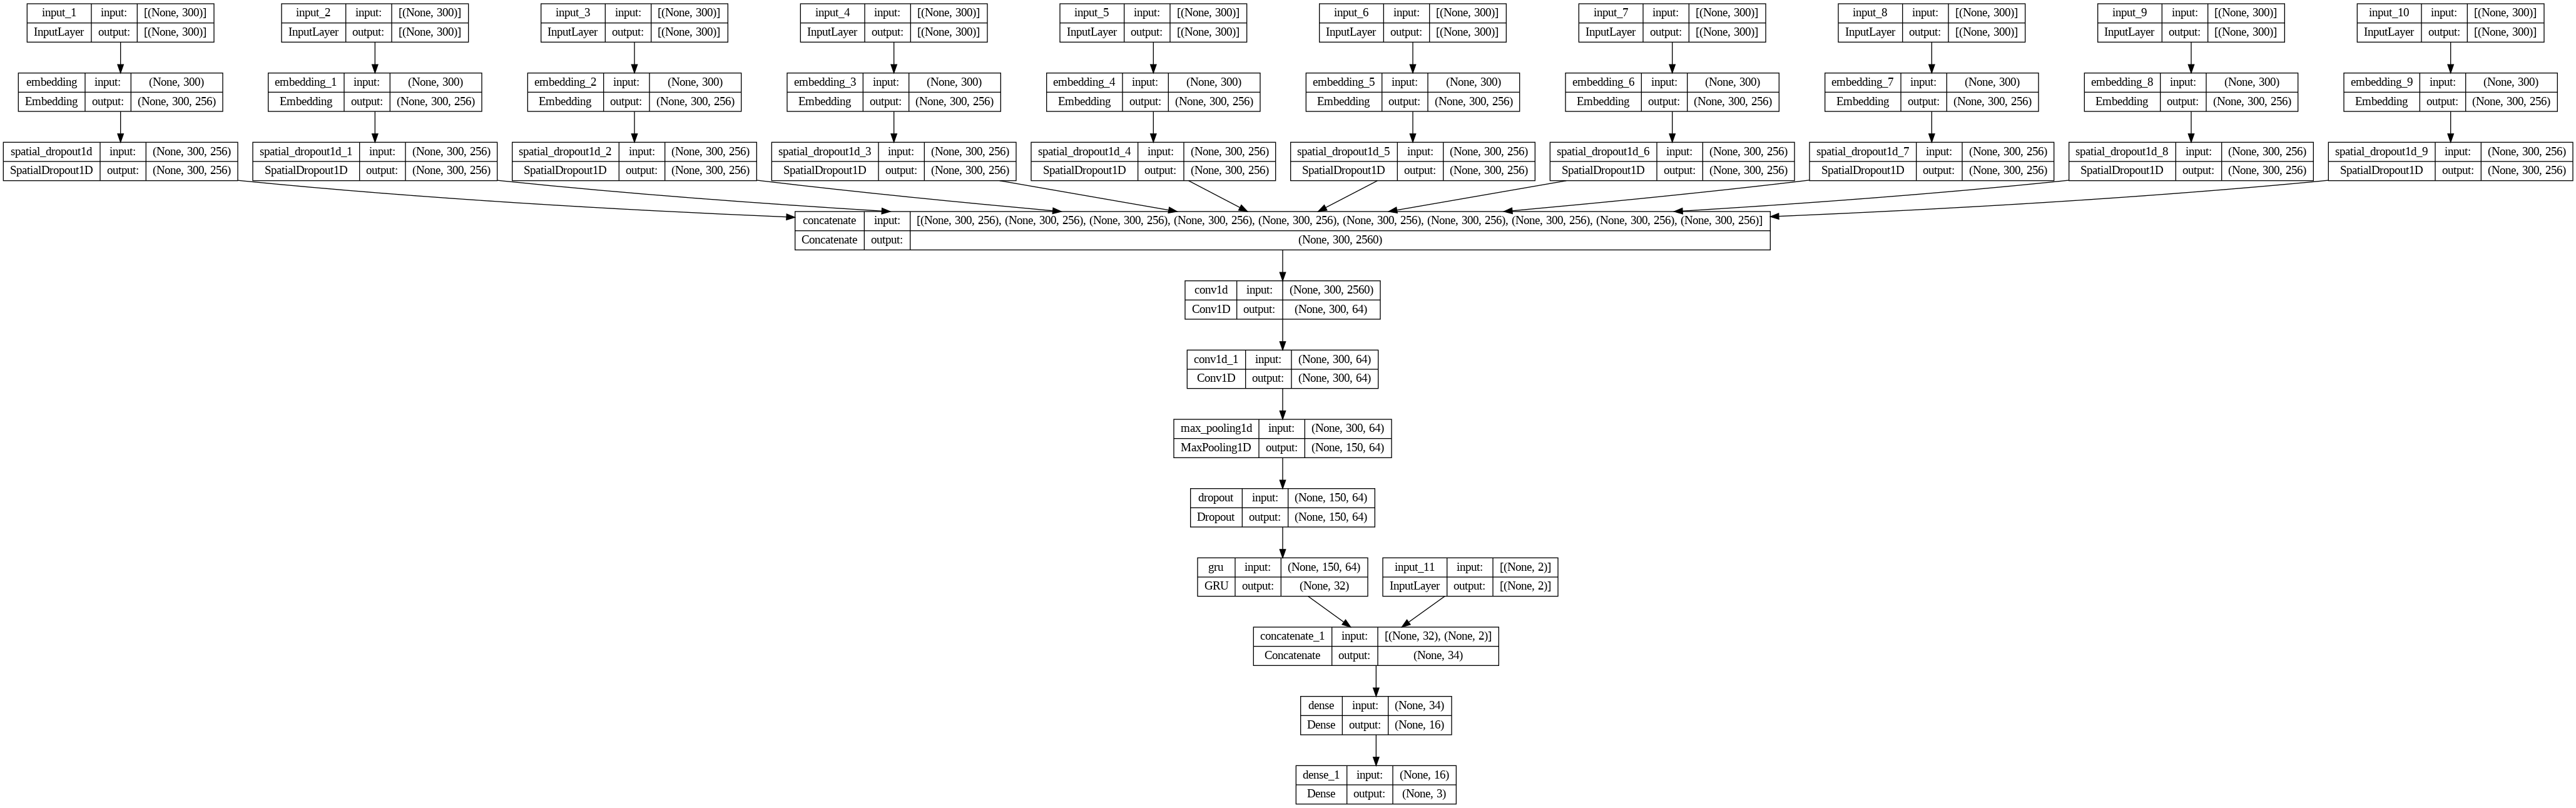

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='LR')
utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
es = callbacks.EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=7, restore_best_weights=True
)
rlp = callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 300)]        0           []                               
                                                                                              

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS = 30

history = model.fit(
    x=[x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train, x10_train, z_train], 
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(                                
        [x1_val, x2_val, x3_val, x4_val, x5_val, x6_val, x7_val, x8_val, x9_val, x10_val, z_val], 
        y_val
    ),
    callbacks=[es, rlp],
    shuffle=True
)
model.save('stacked_embedding.h5')

Epoch 1/30
51/51 [==============================] - 117s 2s/step - loss: 2.2224 - accuracy: 0.3901 - val_loss: 0.9661 - val_accuracy: 0.5222 - lr: 0.0010
Epoch 2/30
51/51 [==============================] - 107s 2s/step - loss: 0.7348 - accuracy: 0.6929 - val_loss: 0.6660 - val_accuracy: 0.7389 - lr: 0.0010
Epoch 3/30
51/51 [==============================] - 106s 2s/step - loss: 0.5425 - accuracy: 0.7851 - val_loss: 0.5234 - val_accuracy: 0.8111 - lr: 0.0010
Epoch 4/30
51/51 [==============================] - 105s 2s/step - loss: 0.4574 - accuracy: 0.8105 - val_loss: 0.4603 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 5/30
51/51 [==============================] - 109s 2s/step - loss: 0.4105 - accuracy: 0.8409 - val_loss: 0.4428 - val_accuracy: 0.8278 - lr: 0.0010
Epoch 6/30
51/51 [==============================] - 105s 2s/step - loss: 0.3773 - accuracy: 0.8588 - val_loss: 0.4072 - val_accuracy: 0.8222 - lr: 0.0010
Epoch 7/30
51/51 [==============================] - 110s 2s/step - loss: 0.3

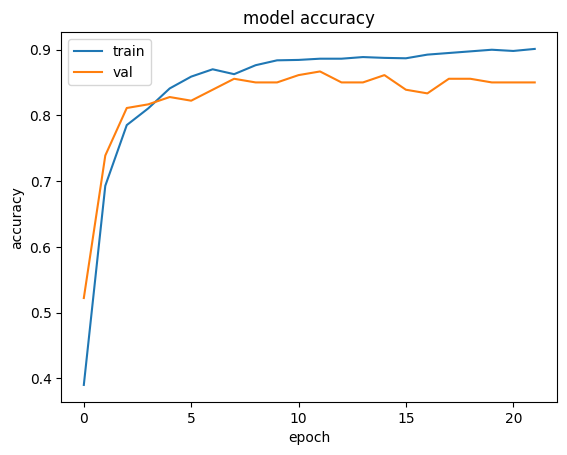

In [ ]:
##Plot model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

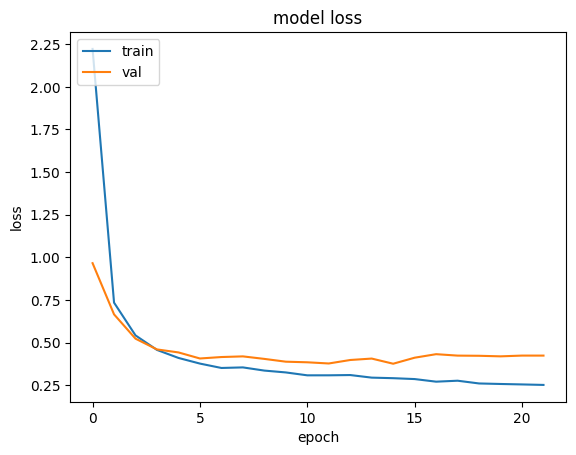

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
x1_test = tokenizer.texts_to_sequences(test.op)
x1_test = tf.keras.preprocessing.sequence.pad_sequences(x1_test, maxlen=MAX_SEQUENCE_LENGTH)

x2_test = tokenizer.texts_to_sequences(test.opstatus)
x2_test = tf.keras.preprocessing.sequence.pad_sequences(x2_test, maxlen=MAX_SEQUENCE_LENGTH)

x3_test = tokenizer.texts_to_sequences(test.cdw10_f)
x3_test = tf.keras.preprocessing.sequence.pad_sequences(x3_test, maxlen=MAX_SEQUENCE_LENGTH)

x4_test = tokenizer.texts_to_sequences(test.cdw10_b)
x4_test = tf.keras.preprocessing.sequence.pad_sequences(x4_test, maxlen=MAX_SEQUENCE_LENGTH)

x5_test = tokenizer.texts_to_sequences(test.cdw11_f)
x5_test = tf.keras.preprocessing.sequence.pad_sequences(x5_test, maxlen=MAX_SEQUENCE_LENGTH)

x6_test = tokenizer.texts_to_sequences(test.cdw11_b)
x6_test = tf.keras.preprocessing.sequence.pad_sequences(x6_test, maxlen=MAX_SEQUENCE_LENGTH)

x7_test = tokenizer.texts_to_sequences(test.cdw12_f)
x7_test = tf.keras.preprocessing.sequence.pad_sequences(x7_test, maxlen=MAX_SEQUENCE_LENGTH)

x8_test = tokenizer.texts_to_sequences(test.cdw12_b)
x8_test = tf.keras.preprocessing.sequence.pad_sequences(x8_test, maxlen=MAX_SEQUENCE_LENGTH)

x9_test = tokenizer.texts_to_sequences(test.cdw13_f)
x9_test = tf.keras.preprocessing.sequence.pad_sequences(x9_test, maxlen=MAX_SEQUENCE_LENGTH)

x10_test = tokenizer.texts_to_sequences(test.cdw13_b)
x10_test = tf.keras.preprocessing.sequence.pad_sequences(x10_test, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
z_test = test
z_test = z_test.drop(['op', 'opstatus', 'cdw10_f', 'cdw10_b', 'cdw11_f', 'cdw11_b', 'cdw12_f', 'cdw12_b', 'cdw13_f', 'cdw13_b', 'status'], axis=1)
z_test.head()

,fw,function
1800,0,24
623,2,45
199,2,17
1553,0,91
262,2,18


In [ ]:
predictions = model.predict([x1_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test, x8_test, x9_test, x10_test, z_test])

15/15 [==============================] - 4s 239ms/step


In [ ]:
index_to_label = {v: k for k, v in label_to_index.items()}

test['pred'] = [index_to_label[idx] for idx in np.argmax(predictions, axis=1)]

submission = test.loc[:, ['pred']].reset_index()

submission.columns = ['index', 'pred']
submission

,index,pred
0,1800,Skip
1,623,Pass
2,199,Fail
3,1553,Pass
4,262,Pass
...,...,...
444,1068,Fail
445,902,Pass
446,956,Pass
447,1459,Skip


In [ ]:
pass_count = 0
fail_count = 0

# df = pd.merge(test.reset_index(), submission, right_index = True, left_index = True)
for index, row in test.iterrows():
  if row['status'] == row['pred']:
    pass_count = pass_count + 1
  else:
    fail_count = fail_count + 1

print("pass_count:", pass_count)
print("fail_count:", fail_count)

pass_count: 369
fail_count: 80
